In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/PBL6

/content/drive/MyDrive/PBL6


# Load dataset


In [ ]:
unzipPath = "./"
!unzip -q COULE.zip -d $unzipPath

replace ./COULE_GT/0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
ls

COULE_GT/    COULE.zip             PBL6_sinogram_to_image_model.ipynb
COULE_test/  images_2d_array.xlsx  sinograms_2d_array.xlsx


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import radon
from skimage.transform import iradon


image_directory = "./COULE_GT/"
num_images = 400
num_angles = 180

sinograms = []
images = []

for i in range(num_images):
    # Tạo tên tệp ảnh
    if (i%40==0):
      print(f'images {i}')
    image_filename = f'{i}.png'
    image = imread(image_directory+image_filename, as_gray=True)
    images.append(image)
    theta = np.linspace(0, 180, max(image.shape), endpoint=False)
    sino = radon(image, theta=theta)
    sinograms.append(sino)
sinograms_array = np.array(sinograms)
images_array = np.array(images)

images 0


/usr/local/lib/python3.10/dist-packages/skimage/transform/radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


images 40
images 80
images 120
images 160
images 200
images 240
images 280
images 320
images 360


In [ ]:
image_directory = "./COULE_test/"
num_images = 30
num_angles = 180

test_sinograms = []
test_images = []

for i in range(num_images):
    # Tạo tên tệp ảnh
    if (i%10==0):
      print(f'images {i}')
    image_filename = f'{i}.png'
    image = imread(image_directory+image_filename, as_gray=True)
    test_images.append(image)
    theta = np.linspace(0, 180, max(image.shape), endpoint=False)
    sino = radon(image, theta=theta)
    test_sinograms.append(sino)
test_sinograms_array = np.array(test_sinograms)
test_images_array = np.array(test_images)

images 0


/usr/local/lib/python3.10/dist-packages/skimage/transform/radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


images 10
images 20


# Lưu vào file

In [ ]:
import pandas as pd

def createFile(your_array,name):
  # Tạo một DataFrame từ mảng 2D
  df = pd.DataFrame(your_array)
  # Đặt tên cho tệp Excel và đường dẫn
  excel_filename = f'{name}.xlsx'
  # Lưu DataFrame vào tệp Excel
  df.to_excel(excel_filename, index=False)
  print(f'Dữ liệu đã được lưu vào tệp {excel_filename}')

In [ ]:
sinograms_array = np.array(sinograms)
print(sinograms_array.shape)
images_array = np.array(images)
print(images_array.shape)

(400, 256, 256)
(400, 256, 256)


In [ ]:
# Chuyển mảng 3D thành mảng 2D (shape=(400, 65536))
sinograms_2d_array = sinograms_array.reshape((sinograms_array.shape[0], -1)).T
print(sinograms_2d_array.shape)
images_2d_array = images_array.reshape((images_array.shape[0], -1)).T
print(images_2d_array.shape)

(65536, 400)
(65536, 400)


In [ ]:
createFile(images_2d_array,"images_2d_array")

Dữ liệu đã được lưu vào tệp images_2d_array.xlsx


In [ ]:
import pandas as pd

# Thay đổi đường dẫn tới tệp Excel của bạn
file_path = './sinograms_2d_array.xlsx'

# Đọc dữ liệu từ tệp Excel vào một DataFrame
sinograms_2d_array = pd.read_excel(file_path)

# Hiển thị một số dòng đầu của DataFrame
print(sinograms_2d_array.head())



   0    1    2    3    4    5    6    7    8    9    ...  390  391       392  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.435294   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.089209   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.000000   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.000000   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.000000   

   393  394  395  396  397  398  399  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 400 columns]


In [ ]:
import pandas as pd

# Thay đổi đường dẫn tới tệp Excel của bạn
file_path = './images_2d_array.xlsx'

# Đọc dữ liệu từ tệp Excel vào một DataFrame
images_2d_array = pd.read_excel(file_path)

# Hiển thị một số dòng đầu của DataFrame
print(images_2d_array.head())

   0    1    2    3    4    5    6    7    8    9    ...  390  391  392  393  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   394  395  396  397  398  399  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 400 columns]


In [ ]:
images_2d_array

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Hàm plot

In [ ]:
import matplotlib.pyplot as plt
def plot(img,title='title',x_name = 'x_name',y_name = 'y_name'):
  plt.imshow(img, cmap='gray')
  plt.xlabel(x_name)
  plt.ylabel(y_name)
  plt.title(title)
  plt.show()

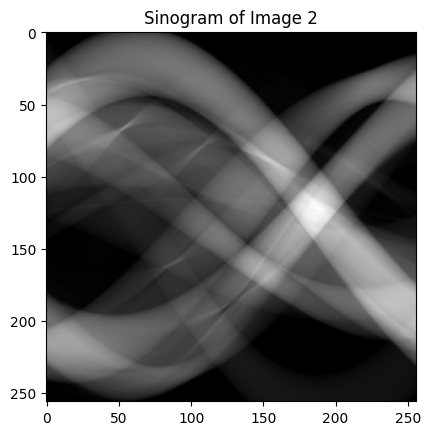

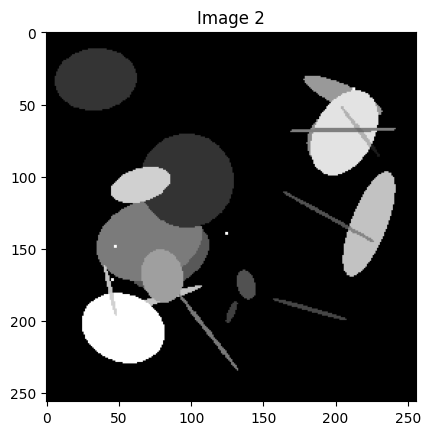

In [ ]:
plt.imshow(sinograms_array[2], cmap='gray')
plt.title("Sinogram of Image 2")
plt.show()
plt.imshow(images_array[2], cmap='gray')
plt.title("Image 2")
plt.show()

# Model CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [37]:
# Đọc dữ liệu train và test (cần tải dữ liệu của bạn vào đây)
x_train = sinograms_array
y_train = images_array
x_test = test_sinograms_array
y_test = test_images_array

input_shape = x_train.shape[1:]
print('input_shape : ', input_shape)

max_value = np.max(x_train)
# mormalize data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)



input_shape :  (256, 256)
x_train shape: (400, 256, 256)
400 train samples
30 test samples
y_train shape: (400, 256, 256)


In [ ]:
model = keras.Sequential([
    layers.Input(shape=(256, 256, 1)),  # Đầu vào là ảnh 256x256 đơn kênh (xám)
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')  # Đầu ra là ảnh tái tạo
])


In [29]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])


In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 64)      640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 128, 128, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 256)       295168    
                                                                 
 up_sampling2d_2 (UpSamplin  (None, 128, 128, 256)    

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
13/13 [==============================] - 44s 1s/step - loss: 0.0962 - val_loss: 0.0858
Epoch 2/10
13/13 [==============================] - 6s 469ms/step - loss: 0.0901 - val_loss: 0.0858
Epoch 3/10
13/13 [==============================] - 6s 468ms/step - loss: 0.0901 - val_loss: 0.0858
Epoch 4/10
13/13 [==============================] - 6s 471ms/step - loss: 0.0901 - val_loss: 0.0858
Epoch 5/10
13/13 [==============================] - 6s 468ms/step - loss: 0.0901 - val_loss: 0.0858
Epoch 6/10
13/13 [==============================] - 6s 472ms/step - loss: 0.0901 - val_loss: 0.0858
Epoch 7/10
13/13 [==============================] - 6s 471ms/step - loss: 0.0901 - val_loss: 0.0858
Epoch 8/10
13/13 [==============================] - 6s 474ms/step - loss: 0.0901 - val_loss: 0.0858
Epoch 9/10
13/13 [==============================] - 6s 473ms/step - loss: 0.0901 - val_loss: 0.0858
Epoch 10/10
13/13 [==============================] - 6s 487ms/step - loss: 0.0901 - val_loss: 0.0858


In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
model_checkpoint = ModelCheckpoint('best_model.h1', monitor='val_accuracy', save_best_only=True, mode='max')

# Callback để dừng huấn luyện khi val_accuracy không cải thiện nữa
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max')

# Huấn luyện mô hình với callbacks
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[model_checkpoint, early_stopping])

Epoch 1/10
13/13 [==============================] - 7s 547ms/step - loss: 0.0901 - accuracy: 0.7587 - val_loss: 0.0858 - val_accuracy: 0.7626
Epoch 2/10
13/13 [==============================] - 6s 466ms/step - loss: 0.0901 - accuracy: 0.7587 - val_loss: 0.0858 - val_accuracy: 0.7626
Epoch 3/10
13/13 [==============================] - 6s 464ms/step - loss: 0.0901 - accuracy: 0.7587 - val_loss: 0.0858 - val_accuracy: 0.7626
Epoch 4/10
13/13 [==============================] - 6s 481ms/step - loss: 0.0901 - accuracy: 0.7587 - val_loss: 0.0858 - val_accuracy: 0.7626
Epoch 5/10
13/13 [==============================] - 6s 466ms/step - loss: 0.0901 - accuracy: 0.7587 - val_loss: 0.0858 - val_accuracy: 0.7626
Epoch 6/10
13/13 [==============================] - 6s 496ms/step - loss: 0.0901 - accuracy: 0.7587 - val_loss: 0.0858 - val_accuracy: 0.7626


In [39]:
reconstructed_img = model.predict(x_test)

1/1 [==============================] - 0s 155ms/step


In [41]:
reconstructed_img.shape

(30, 256, 256, 1)

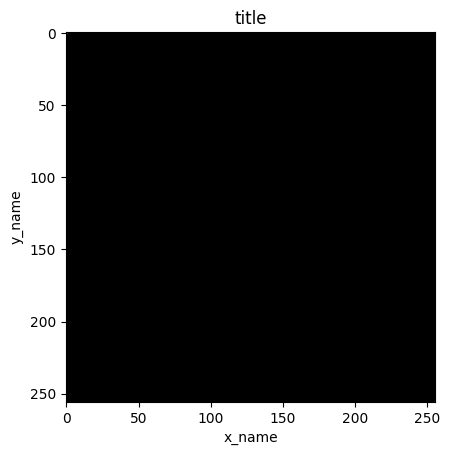

In [44]:
plot(reconstructed_img[3])

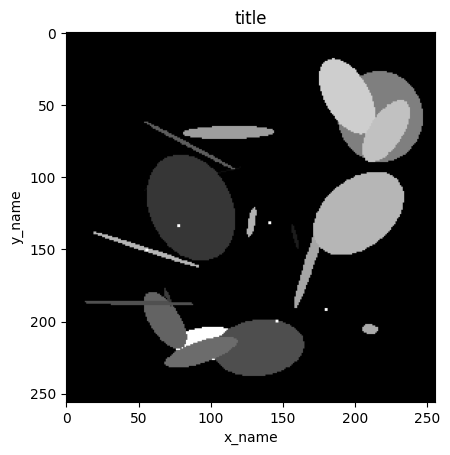

In [45]:
plot(y_test[3])

# Model DenseNet

In [48]:
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Input, Flatten, Dropout
from tensorflow.keras.layers import concatenate, Activation
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical

In [60]:
x_train.shape

(400, 256, 256)

In [56]:
# training parameters
batch_size = 32
epochs = 20
data_augmentation = True

# network parameters
num_classes = 10
num_dense_blocks = 3
use_max_pool = False

growth_rate = 12
depth = 100
num_bottleneck_layers = (depth - 4) // (2 * num_dense_blocks)

num_filters_bef_dense_block = 2 * growth_rate
compression_factor = 0.5


input_shape = x_train.shape[1:]

# mormalize data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)


def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr


# start model definition
# densenet CNNs (composite function) are made of BN-ReLU-Conv2D
inputs = Input(shape=input_shape)
x = BatchNormalization()(inputs)
x = Activation('relu')(x)
x = Conv2D(num_filters_bef_dense_block,
           kernel_size=3,
           padding='same',
           kernel_initializer='he_normal')(x)
x = concatenate([inputs, x])

# stack of dense blocks bridged by transition layers
for i in range(num_dense_blocks):
    # a dense block is a stack of bottleneck layers
    for j in range(num_bottleneck_layers):
        y = BatchNormalization()(x)
        y = Activation('relu')(y)
        y = Conv2D(4 * growth_rate,
                   kernel_size=1,
                   padding='same',
                   kernel_initializer='he_normal')(y)
        if not data_augmentation:
            y = Dropout(0.2)(y)
        y = BatchNormalization()(y)
        y = Activation('relu')(y)
        y = Conv2D(growth_rate,
                   kernel_size=3,
                   padding='same',
                   kernel_initializer='he_normal')(y)
        if not data_augmentation:
            y = Dropout(0.2)(y)
        x = concatenate([x, y])

    # no transition layer after the last dense block
    if i == num_dense_blocks - 1:
        continue

    # transition layer compresses num of feature maps and reduces the size by 2
    num_filters_bef_dense_block += num_bottleneck_layers * growth_rate
    num_filters_bef_dense_block = int(num_filters_bef_dense_block * compression_factor)
    y = BatchNormalization()(x)
    y = Conv2D(num_filters_bef_dense_block,
               kernel_size=1,
               padding='same',
               kernel_initializer='he_normal')(y)
    if not data_augmentation:
        y = Dropout(0.2)(y)
    x = AveragePooling2D()(y)


# add classifier on top
# after average pooling, size of feature map is 1 x 1
x = AveragePooling2D(pool_size=8)(x)
y = Flatten()(x)


outputs = Conv2D(1, kernel_size=3, padding='same', activation='linear')(x)
modelDense = Model(inputs=inputs, outputs=outputs)
modelDense.compile(loss='mean_squared_error',
              optimizer=RMSprop(1e-3),
              metrics=['acc'])
modelDense.summary()

x_train shape: (400, 256, 256)
400 train samples
30 test samples
y_train shape: (400, 256, 256)


ValueError: ignored

In [66]:
, metrics
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, UpSampling2D
from tensorflow.keras.models import Model

# Input shape for CT image
input_shape = (256, 256, 1)

# Define the input layer
inputs = Input(shape=input_shape)

# Encoder
x = Conv2D(64, (3, 3), padding='same')(inputs)
x = Activation('relu')(x)
x = BatchNormalization()(x)

x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)

# Add more encoder layers as needed

# Decoder
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)

# Add more decoder layers as needed

# Output layer
x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Create the model
model = Model(inputs, x)

# Compile the model with an appropriate loss function (e.g., mean squared error for image reconstruction)
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
model.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_34 (Conv2D)          (None, 256, 256, 64)      640       
                                                                 
 activation_6 (Activation)   (None, 256, 256, 64)      0         
                                                                 
 batch_normalization_6 (Bat  (None, 256, 256, 64)      256       
 chNormalization)                                                
                                                                 
 conv2d_35 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 activation_7 (Activation)   (None, 128, 128, 128)     0         
                                                           

In [67]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
model_checkpoint = ModelCheckpoint('best_model_autoEncoder.h1', monitor='val_accuracy', save_best_only=True, mode='max')

# Callback để dừng huấn luyện khi val_accuracy không cải thiện nữa
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max')

# Huấn luyện mô hình với callbacks
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[model_checkpoint, early_stopping])

Epoch 1/20
13/13 [==============================] - 9s 573ms/step - loss: 0.1879 - accuracy: 0.7528 - val_loss: 0.1554 - val_accuracy: 0.7626
Epoch 2/20
13/13 [==============================] - 6s 430ms/step - loss: 0.1272 - accuracy: 0.7505 - val_loss: 0.0861 - val_accuracy: 0.7626
Epoch 3/20
13/13 [==============================] - 6s 430ms/step - loss: 0.0905 - accuracy: 0.7574 - val_loss: 0.0716 - val_accuracy: 0.7626
Epoch 4/20
13/13 [==============================] - 6s 429ms/step - loss: 0.0760 - accuracy: 0.7587 - val_loss: 0.0726 - val_accuracy: 0.7626
Epoch 5/20
13/13 [==============================] - 6s 429ms/step - loss: 0.0733 - accuracy: 0.7587 - val_loss: 0.0744 - val_accuracy: 0.7626
Epoch 6/20
13/13 [==============================] - 6s 423ms/step - loss: 0.0731 - accuracy: 0.7587 - val_loss: 0.0740 - val_accuracy: 0.7626


In [93]:
reconstructed_img = model.predict(x_test)

1/1 [==============================] - 0s 24ms/step


In [100]:
reconstructed_img[0]
# col1, col2, col3,col4 = reconstructed_img
# print("Giá trị cột 2:", col2)
# print("Giá trị cột 3:", col3)

array([[[0.2415278 ],
        [0.14099252],
        [0.14086369],
        ...,
        [0.14456065],
        [0.17525777],
        [0.25492153]],

       [[0.14272065],
        [0.05033875],
        [0.05107039],
        ...,
        [0.05177538],
        [0.06746449],
        [0.14246476]],

       [[0.15339708],
        [0.06138951],
        [0.06863997],
        ...,
        [0.07109047],
        [0.09078676],
        [0.1815399 ]],

       ...,

       [[0.15278521],
        [0.06163121],
        [0.06965568],
        ...,
        [0.0712537 ],
        [0.09008859],
        [0.17880988]],

       [[0.16554986],
        [0.07748281],
        [0.0881073 ],
        ...,
        [0.09120105],
        [0.110424  ],
        [0.21053962]],

       [[0.26979634],
        [0.16805948],
        [0.18554384],
        ...,
        [0.18891598],
        [0.19733548],
        [0.2892167 ]]], dtype=float32)

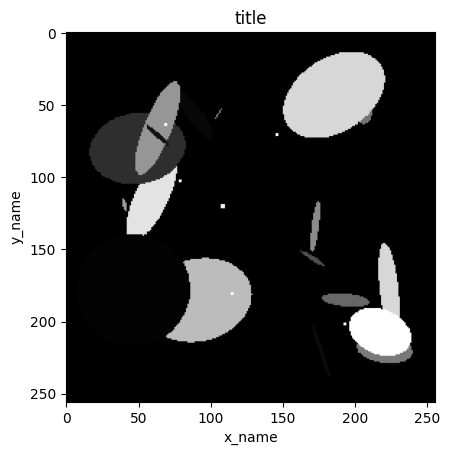

In [102]:
y_test[0]

# U - net